<a href="https://colab.research.google.com/github/diogoscsilva/ConvertToBinary/blob/main/BinaryConversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as mp

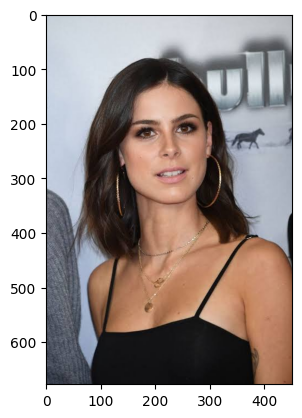

In [ ]:
img = np.asarray(Image.open("images.jpeg").convert("RGB"))
mp.imshow(img)

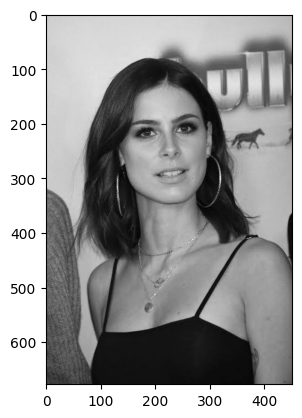

In [ ]:
gray_img = np.zeros_like(img)  # Create an empty array with the same shape and data type as img
histo = {}
total = 0
for row in range(len(img)):
    for col in range(len(img[row])):
        pixel = img[row][col]
        gray_pixel = (int)((0.299 * pixel[0]) + (0.587 * pixel[1]) + (0.114 * pixel[2]))
        histo[gray_pixel] = 1 if not gray_pixel in histo else histo[gray_pixel] + 1
        total += 1
        gray_img[row, col] = gray_pixel
mp.imshow(gray_img)

In [ ]:
half = total / 2
count = 0
limit = 0
for i in range(256):
    if i in histo:
        count += histo[i]
        if count > half:
            limit = (int)(i + 1.2 * (128 - i) / 4)
            break
print(limit)

137


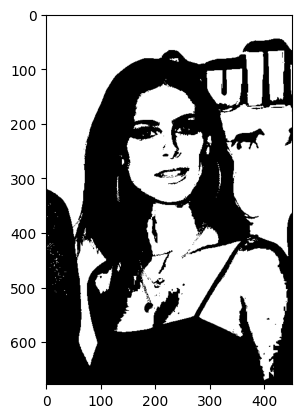

In [ ]:
binary_img = np.zeros_like(gray_img)  # Create an empty array with the same shape and data type as img
for row in range(len(gray_img)):
    for col in range(len(gray_img[row])):
        pixel = gray_img[row][col]
        binary_pixel = 0 if pixel[0] < limit else 255
        binary_img[row, col] = binary_pixel
mp.imshow(binary_img)